In [11]:
import pickle 
import matplotlib.pyplot as plt

In [7]:
loaded_figures = []
fig_names = [
    'freq_sweep_body_H.pkl',
    'freq_sweep_body_V.pkl',
    'freq_sweep_body_wing_H.pkl',
    'freq_sweep_body_wing_V.pkl',
]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

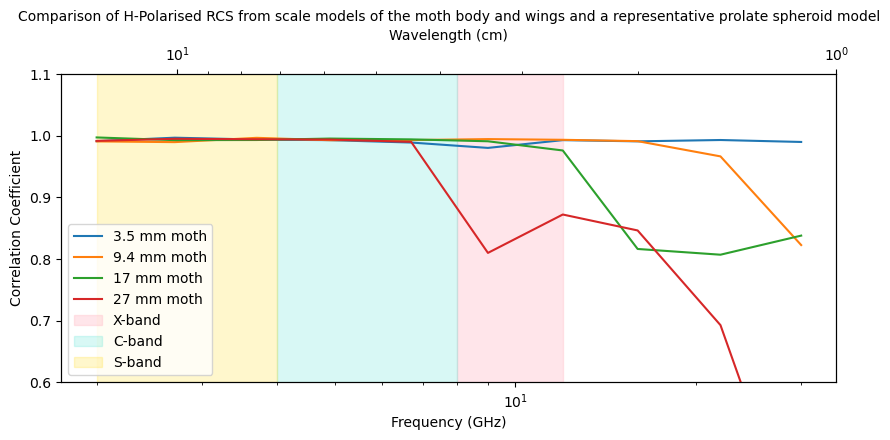

<Figure size 640x480 with 0 Axes>

In [13]:
for fig in fig_names:
    with open(fig, 'rb') as f:
        loaded_figures.append(pickle.load(f))

In [23]:
loaded_figures[3].show()

/var/folders/hq/kb5mxt3j4m1fs9p7jgvy96vh0000gr/T/ipykernel_58278/500421189.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  loaded_figures[3].show()


AttributeError: 'Figure' object has no attribute 'get_lines'

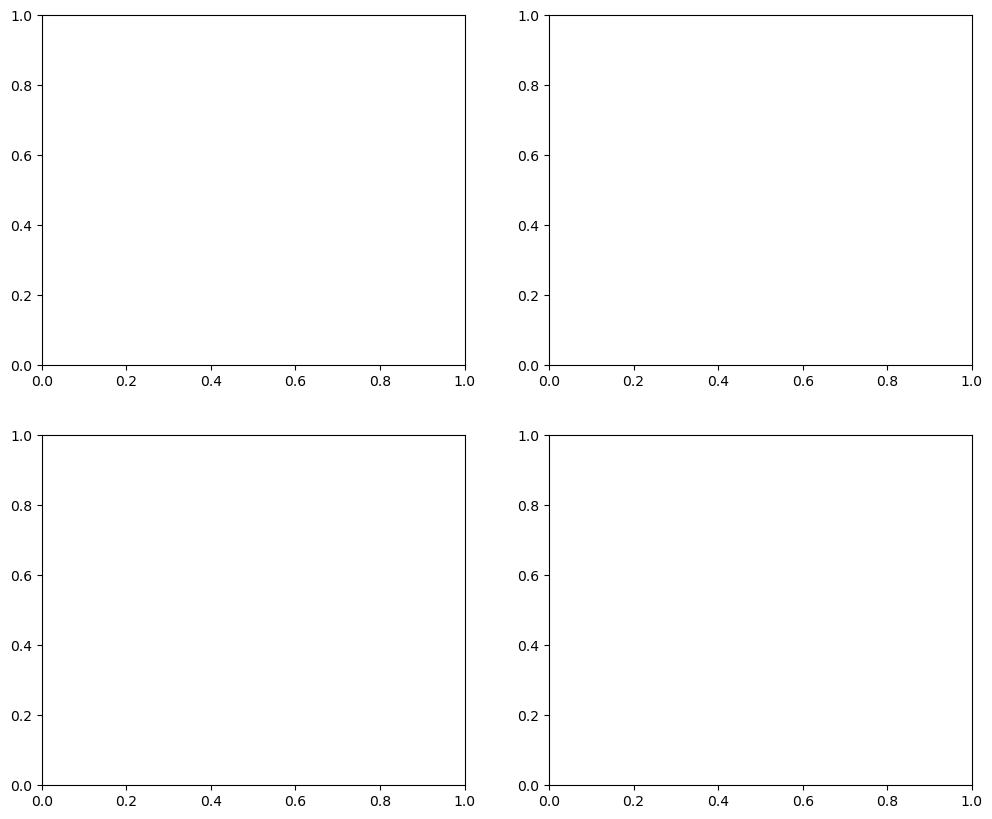

In [21]:
# Create a new figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Transfer content from each loaded figure into the master plot
for i, (loaded_fig, target_ax) in enumerate(zip(loaded_figures, axs)):
    source_ax = loaded_figures[2]  # Assume 1 axis per figure
    for line in source_ax.get_lines():
        x, y = line.get_data()
        target_ax.plot(x, y, label=line.get_label())

    # Copy axis labels
    target_ax.set_xlabel(source_ax.get_xlabel())
    target_ax.set_ylabel(source_ax.get_ylabel())

    # Optional: Copy title or set new one
    target_ax.set_title(f'Subplot {i+1}')

    # Optional: Copy limits
    target_ax.set_xlim(source_ax.get_xlim())
    target_ax.set_ylim(source_ax.get_ylim())

    # Optional: Copy legend
    target_ax.legend()

# Add overall title
fig.suptitle("Combined Summary of All Subplots", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()